# Feature detection and description

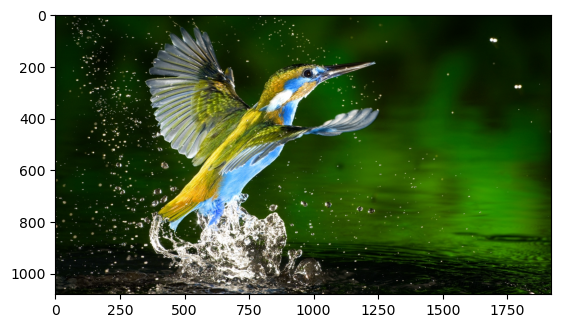

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the image
image = cv2.imread(r"C:\Users\Admin\CV\New folder\kingfisher bird.jpg", cv2.IMREAD_COLOR)
plt.imshow(image)

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
sift = cv2.SIFT_create()

In [6]:
keypoints, descriptors = sift.detectAndCompute(gray, None)

In [11]:
image_with_keypoints = cv2.drawKeypoints(gray, keypoints, image, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

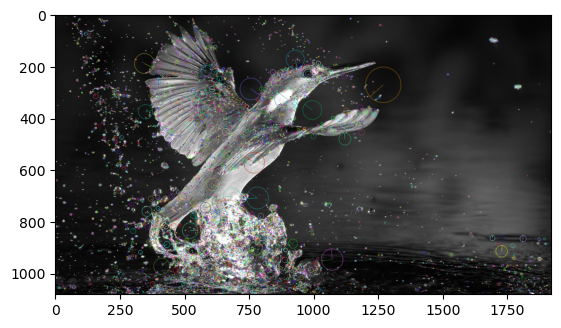

In [12]:
plt.imshow(image_with_keypoints)

In [13]:
fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

In [14]:
keypoints = fast.detect(image, None)

In [18]:
image_with_keypoints = cv2.drawKeypoints (image,keypoints, None, color=(0,255,0))

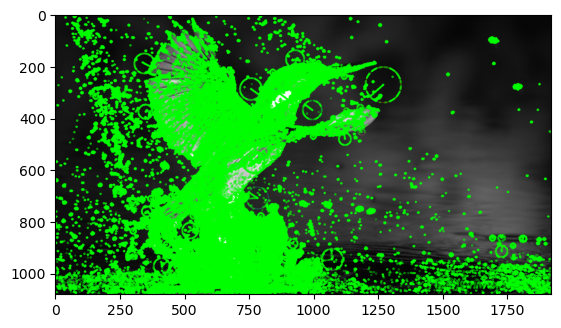

In [19]:
plt.imshow(image_with_keypoints)

In [13]:
# Display the output image
#cv2.imshow('KeyPoints', output_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Feature matching and model fitting

In [45]:
# Load two images you want to match
image1 = cv2.imread(r"C:\Users\Admin\CV\New folder\virat kohli.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(r"C:\Users\Admin\CV\New folder\virat.jpeg", cv2.IMREAD_GRAYSCALE)

In [46]:
# Initialize the feature detector and descriptor (e.g., SIFT)
detector = cv2.SIFT_create()
descriptor = cv2.SIFT_create()

In [47]:
# Find the keypoints and descriptors in both images
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

In [48]:
# Initialize a BFMatcher (Brute-Force Matcher) and perform feature matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [49]:
# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

In [50]:
# Draw the matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None)

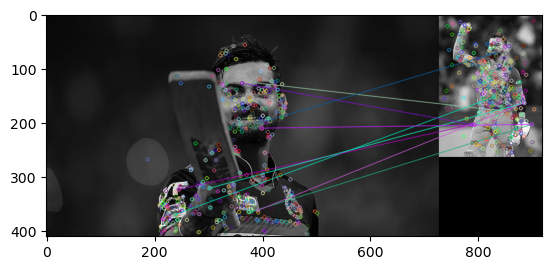

In [63]:
# Display the matched image
plt.imshow(matched_image,cmap ='gray')
plt.show()
cv2.imshow('Feature Matching', matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
